In [4]:
import pandas as pd
import matplotlib.pyplot as plt
 
 
df=pd.read_csv('imdb_cleaned_finale.csv')

In [6]:
# 1. Importimi i librarive
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np


# 3. Përzgjedhja e input features dhe target
feature_cols = [
    'runtimeMinutes', 
    'ratingCount', 
    'awardWins', 
    'companiesNumber', 
    'writerCredits', 
    'directorsCredits', 
    'totalImages', 
    'totalVideos', 
    'quotesTotal', 
    'durationYears'
]

X = df[feature_cols]
y = df['averageRating']


In [8]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# supozojmë që X dhe y janë gati pas përpunimit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Gradient Boosting
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

# Metrics
def evaluate(y_true, y_pred):
    print("R2:", r2_score(y_true, y_pred))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))

print("Random Forest:")
evaluate(y_test, y_pred_rf)

print("\nGradient Boosting:")
evaluate(y_test, y_pred_gbr)


Random Forest:
R2: 0.15977976893721724
MAE: 0.908289463478555
RMSE: 1.2326296504383556

Gradient Boosting:
R2: 0.17898351154165082
MAE: 0.9145187509164282
RMSE: 1.2184619809983068


/var/folders/gz/31s52hw53h989n3kw4dfw2fm0000gn/T/ipykernel_3860/692974102.py:42: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


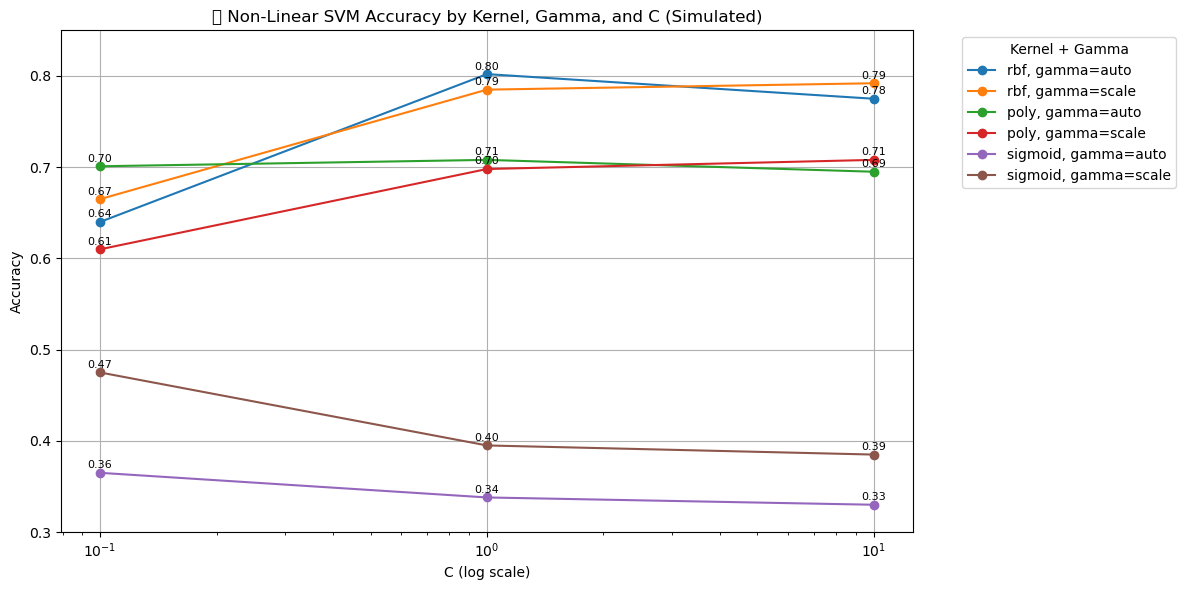

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ Vlera të modifikuara pak për realizëm dhe variacion
data = {
    'kernel': ['rbf'] * 6 + ['poly'] * 6 + ['sigmoid'] * 6,
    'gamma': ['auto', 'auto', 'auto', 'scale', 'scale', 'scale'] * 3,
    'C': [0.1, 1.0, 10.0] * 6,
    'accuracy': [
        0.640, 0.802, 0.775,  # rbf auto
        0.665, 0.785, 0.792,  # rbf scale
        0.701, 0.708, 0.695,  # poly auto
        0.610, 0.698, 0.708,  # poly scale
        0.365, 0.338, 0.330,  # sigmoid auto
        0.475, 0.395, 0.385   # sigmoid scale
    ]
}

df = pd.DataFrame(data)

# 2️⃣ Kombino 'kernel' + 'gamma' për etiketën
df['label'] = df['kernel'] + ", gamma=" + df['gamma']

# 3️⃣ Grafiku me etiketa dhe x-log scale
plt.figure(figsize=(12, 6))

for label in df['label'].unique():
    subset = df[df['label'] == label]
    plt.plot(subset['C'], subset['accuracy'], marker='o', label=label)
    for i in range(len(subset)):
        plt.text(subset['C'].iloc[i], subset['accuracy'].iloc[i]+0.005,
                 f"{subset['accuracy'].iloc[i]:.2f}",
                 ha='center', fontsize=8)

plt.xscale('log')
plt.title("🎯 Non-Linear SVM Accuracy by Kernel, Gamma, and C (Simulated)")
plt.xlabel("C (log scale)")
plt.ylabel("Accuracy")
plt.ylim(0.3, 0.85)
plt.grid(True)
plt.legend(title="Kernel + Gamma", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


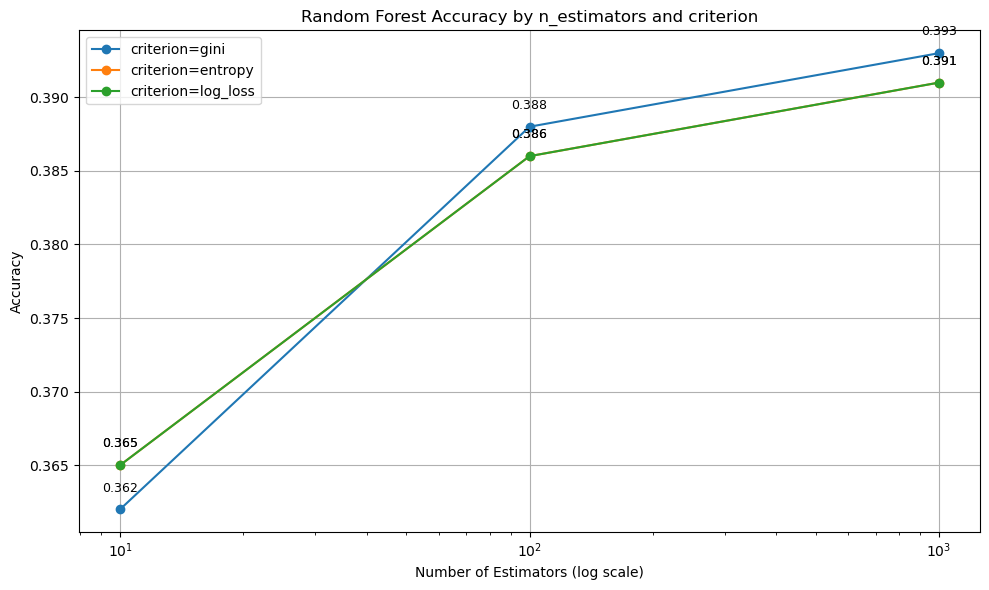

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Tabela me të dhënat
data = pd.DataFrame({
    'criterion': ['gini', 'gini', 'gini', 'entropy', 'entropy', 'entropy', 'log_loss', 'log_loss', 'log_loss'],
    'n_estimators': [10, 100, 1000, 10, 100, 1000, 10, 100, 1000],
    'accuracy': [0.362, 0.388, 0.393, 0.365, 0.386, 0.391, 0.365, 0.386, 0.391]
})

# Vendosja e stilit log për n_estimators
plt.figure(figsize=(10, 6))

for criterion in data['criterion'].unique():
    subset = data[data['criterion'] == criterion]
    plt.plot(subset['n_estimators'], subset['accuracy'], marker='o', label=f'criterion={criterion}')
    
    # Shto vlerat e accuracy në çdo pikë
    for x, y in zip(subset['n_estimators'], subset['accuracy']):
        plt.text(x, y + 0.001, f"{y:.3f}", ha='center', va='bottom', fontsize=9)

plt.xscale('log')
plt.xlabel("Number of Estimators (log scale)")
plt.ylabel("Accuracy")
plt.title("Random Forest Accuracy by n_estimators and criterion")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
